In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [4]:
df_B1 = pd.read_csv('../data/B_1_methane.csv', sep=';', decimal=',', header = None)
df_B1.columns = ['T_B_1', 'B_1']
df_B2 = pd.read_csv('../data/B_2_methane.csv', sep=';', decimal=',', header = None)
df_B2.columns = ['T_B_2', 'B_2']

In [5]:
df_B1

,T_B_1,B_1
0,110.83,-330.10
1,112.43,-319.90
2,114.45,-307.80
3,116.79,-295.50
4,121.25,-274.50
...,...,...
86,598.29,7.86
87,623.15,9.66
88,623.30,9.64
89,648.31,11.25


Теперь аппроксимируем эти функции.

$B_1$ хорошо аппроксимируется с помощью полинома $B_1 = a + b/T + c/T^2$ 

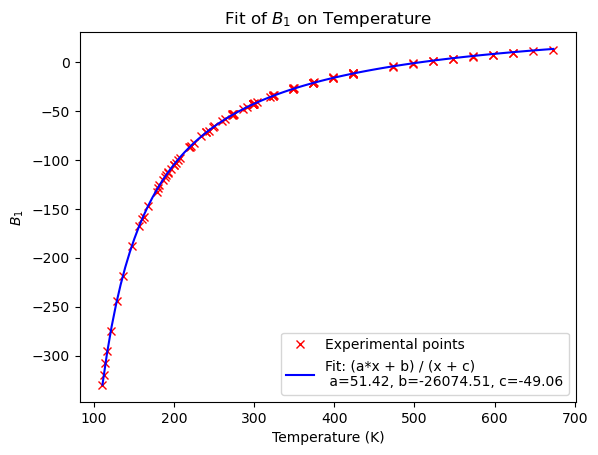

In [7]:
# Определяем функцию вида (a*x + b) / (x + c)
def func(x, a, b, c):
    return (a * x + b) / (x + c)

# Аппроксимация
popt, pcov = curve_fit(func, df_B1['T_B_1'], df_B1['B_1'])

# Оптимальные параметры
a, b, c = popt

# Генерируем точки для аппроксимационной функции
T_fit = np.linspace(min(df_B1['T_B_1']), max(df_B1['T_B_1']), 100)
B_2_fit = func(T_fit, *popt)

# Строим график
plt.plot(df_B1['T_B_1'], df_B1['B_1'], 'rx', label='Experimental points')
plt.plot(T_fit, B_2_fit, 'b-', label=f'Fit: (a*x + b) / (x + c)\n a={a:.2f}, b={b:.2f}, c={c:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('$B_1$')
plt.title('Fit of $B_1$ on Temperature')
plt.legend()
plt.show()


Accuracy metrics for the fit:
R^2: 0.9999
Adjusted R^2: 0.9999
MSE: 0.3179
MAE: 0.4154


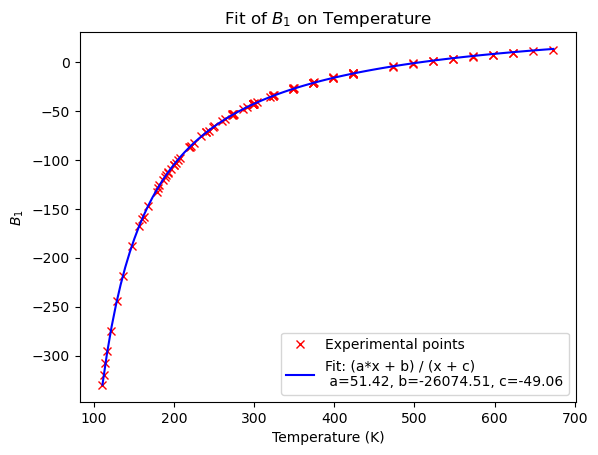

In [8]:
# Определяем функцию вида (a*x + b) / (x + c)
def func(x, a, b, c):
    return (a * x + b) / (x + c)

# Аппроксимация
popt, pcov = curve_fit(func, df_B1['T_B_1'], df_B1['B_1'])

# Оптимальные параметры
a, b, c = popt

# Генерируем точки для аппроксимационной функции
T_fit = np.linspace(min(df_B1['T_B_1']), max(df_B1['T_B_1']), 100)
B_1_fit = func(T_fit, *popt)

# Вычисляем аппроксимационные значения для исходных точек
B_1_approx = func(df_B1['T_B_1'], *popt)

# Вычисляем метрики точности
r2 = r2_score(df_B1['B_1'], B_1_approx)
n = len(df_B1['B_1'])
p = len(popt)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(df_B1['B_1'], B_1_approx)
mae = mean_absolute_error(df_B1['B_1'], B_1_approx)

# Вывод метрик точности
print(f'Accuracy metrics for the fit:')
print(f'R^2: {r2:.4f}')
print(f'Adjusted R^2: {adjusted_r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

# Строим график
plt.plot(df_B1['T_B_1'], df_B1['B_1'], 'rx', label='Experimental points')
plt.plot(T_fit, B_1_fit, 'b-', label=f'Fit: (a*x + b) / (x + c)\n a={a:.2f}, b={b:.2f}, c={c:.2f}')
plt.xlabel('Temperature (K)')
plt.ylabel('$B_1$')
plt.title('Fit of $B_1$ on Temperature')
plt.legend()
plt.show()


Accuracy metrics for polynomial fit (degrees -2 to 0):
R^2: 0.9998
MSE: 1.4464
MAE: 0.9204


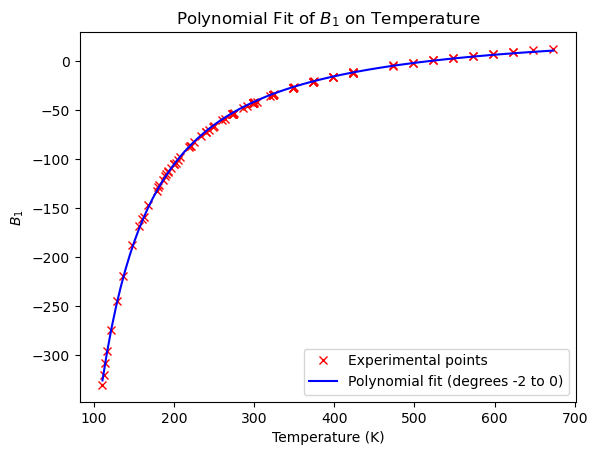

In [9]:
def poly_func(x, *coeffs):
    """Функция аппроксимации полиномом, включающим степени от min_degree до max_degree."""
    min_degree, max_degree = poly_func.degree_range
    return sum(c * x**i for i, c in zip(range(min_degree, max_degree + 1), coeffs))

def fit_polynomial_B1(df, min_degree, max_degree):
    """Функция для аппроксимации данных полиномом от min_degree до max_degree."""
    # Сохраняем диапазон степеней в атрибут функции
    poly_func.degree_range = (min_degree, max_degree)

    # Инициализируем начальные приближения для коэффициентов
    initial_guess = [1] * (max_degree - min_degree + 1)

    # Аппроксимация
    popt, _ = curve_fit(poly_func, df['T_B_1'], df['B_1'], p0=initial_guess)

    # Генерируем точки для аппроксимационной функции
    T_fit = np.linspace(min(df['T_B_1']), max(df['T_B_1']), 100)
    B_1_fit = poly_func(T_fit, *popt)

   # Вычисляем аппроксимационные значения для исходных точек
    B_1_approx = poly_func(df['T_B_1'], *popt)

    # Вычисляем метрики точности
    r2 = r2_score(df['B_1'], B_1_approx)
    mse = mean_squared_error(df['B_1'], B_1_approx)
    mae = mean_absolute_error(df['B_1'], B_1_approx)

    # Вывод метрик точности
    print(f'Accuracy metrics for polynomial fit (degrees {min_degree} to {max_degree}):')
    print(f'R^2: {r2:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')


    # Строим график
    plt.plot(df['T_B_1'], df['B_1'], 'rx', label='Experimental points')
    plt.plot(T_fit, B_1_fit, 'b-', label=f'Polynomial fit (degrees {min_degree} to {max_degree})')
    plt.xlabel('Temperature (K)')
    plt.ylabel('$B_1$')
    plt.title('Polynomial Fit of $B_1$ on Temperature')
    plt.legend()
    plt.show()

# Пример использования функции с диапазоном степеней от -5 до 5
fit_polynomial_B1(df_B1, -2, 0)

Accuracy metrics for polynomial fit (degrees -2 to 0):
R^2: 0.9998
Adjusted R^2: 0.9998
MSE: 1.4464
MAE: 0.9204


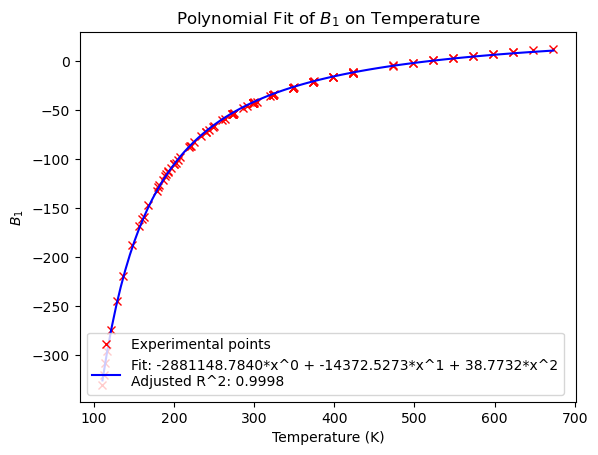

In [ ]:
def poly_func(x, *coeffs):
    """Функция аппроксимации полиномом, включающим степени от min_degree до max_degree."""
    min_degree, max_degree = poly_func.degree_range
    return sum(c * x**i for i, c in zip(range(min_degree, max_degree + 1), coeffs))

def fit_polynomial_B1(df, min_degree, max_degree):
    """Функция для аппроксимации данных полиномом от min_degree до max_degree."""
    # Сохраняем диапазон степеней в атрибут функции
    poly_func.degree_range = (min_degree, max_degree)

    # Инициализируем начальные приближения для коэффициентов
    initial_guess = [1] * (max_degree - min_degree + 1)

    # Аппроксимация
    popt, _ = curve_fit(poly_func, df['T_B_1'], df['B_1'], p0=initial_guess)

    # Генерируем точки для аппроксимационной функции
    T_fit = np.linspace(min(df['T_B_1']), max(df['T_B_1']), 100)
    B_1_fit = poly_func(T_fit, *popt)

    # Вычисляем аппроксимационные значения для исходных точек
    B_1_approx = poly_func(df['T_B_1'], *popt)

    # Вычисляем метрики точности
    r2 = r2_score(df['B_1'], B_1_approx)
    n = len(df['B_1'])
    p = len(popt)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(df['B_1'], B_1_approx)
    mae = mean_absolute_error(df['B_1'], B_1_approx)

    # Вывод метрик точности
    print(f'Accuracy metrics for polynomial fit (degrees {min_degree} to {max_degree}):')
    print(f'R^2: {r2:.4f}')
    print(f'Adjusted R^2: {adjusted_r2:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')

    # Формируем строку с функцией
    terms = [f"{coef:.4f}*x^{i}" for i, coef in enumerate(popt)]
    poly_expr = " + ".join(terms)

    # Строим график
    plt.plot(df['T_B_1'], df['B_1'], 'rx', label='Experimental points')
    plt.plot(T_fit, B_1_fit, 'b-', label=f'Fit: {poly_expr}\nAdjusted R^2: {adjusted_r2:.4f}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('$B_1$')
    plt.title('Polynomial Fit of $B_1$ on Temperature')
    plt.legend()
    plt.show()

# Пример использования функции с диапазоном степеней от -2 до 2
fit_polynomial_B1(df_B1, -2, 0)


Accuracy metrics for polynomial fit (degrees -4 to 3):
R^2: 0.9509
MSE: 0.1876
MAE: 0.2136


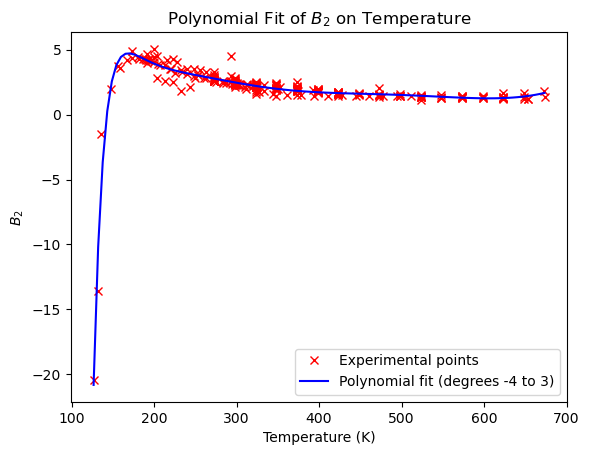

In [10]:
def poly_func(x, *coeffs):
    """Функция аппроксимации полиномом, включающим степени от min_degree до max_degree."""
    min_degree, max_degree = poly_func.degree_range
    return sum(c * x**i for i, c in zip(range(min_degree, max_degree + 1), coeffs))

def fit_polynomial(df, min_degree, max_degree):
    """Функция для аппроксимации данных полиномом от min_degree до max_degree."""
    # Сохраняем диапазон степеней в атрибут функции
    poly_func.degree_range = (min_degree, max_degree)

    # Инициализируем начальные приближения для коэффициентов
    initial_guess = [1] * (max_degree - min_degree + 1)

    # Аппроксимация
    popt, _ = curve_fit(poly_func, df['T_B_2'], df['B_2'], p0=initial_guess)

    # Генерируем точки для аппроксимационной функции
    T_fit = np.linspace(min(df['T_B_2']), max(df['T_B_2']), 100)
    B_2_fit = poly_func(T_fit, *popt)

   # Вычисляем аппроксимационные значения для исходных точек
    B_2_approx = poly_func(df['T_B_2'], *popt)

    # Вычисляем метрики точности
    r2 = r2_score(df['B_2'], B_2_approx)
    mse = mean_squared_error(df['B_2'], B_2_approx)
    mae = mean_absolute_error(df['B_2'], B_2_approx)

    # Вывод метрик точности
    print(f'Accuracy metrics for polynomial fit (degrees {min_degree} to {max_degree}):')
    print(f'R^2: {r2:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')


    # Строим график
    plt.plot(df['T_B_2'], df['B_2'], 'rx', label='Experimental points')
    plt.plot(T_fit, B_2_fit, 'b-', label=f'Polynomial fit (degrees {min_degree} to {max_degree})')
    plt.xlabel('Temperature (K)')
    plt.ylabel('$B_2$')
    plt.title('Polynomial Fit of $B_2$ on Temperature')
    plt.legend()
    plt.show()

# Пример использования функции с диапазоном степеней от -5 до 5
fit_polynomial(df_B2, -4, 3)


Accuracy metrics for rational fit (numerator degree 1, denominator degree 3):
R^2: 0.9540
MSE: 0.1759
MAE: 0.2037
Fitted rational function: f(x) = (-1034.9213 * x^0 + 7.3022 * x^1) / (289.8747 * x^0 + -4.9040 * x^1 + 0.0228 * x^2 + -0.0000 * x^3)


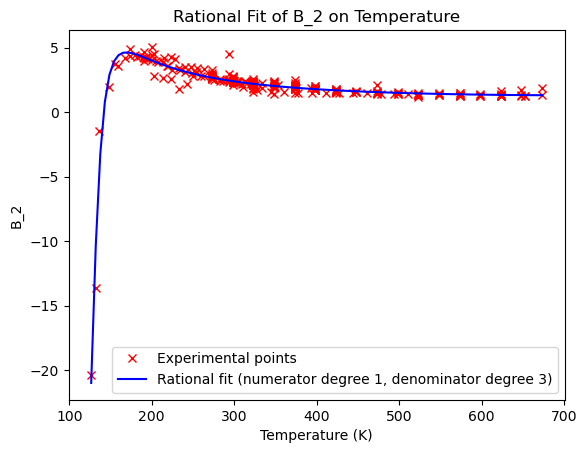

In [ ]:
def rational_func(x, *params):
    """Рациональная функция с заданными степенями числителя и знаменателя."""
    num_degree, denom_degree = rational_func.degrees
    numerator = sum(params[i] * x**i for i in range(num_degree + 1))
    denominator = sum(params[num_degree + 1 + i] * x**i for i in range(denom_degree + 1))
    return numerator / denominator

def fit_rational(df, temp_col, B_col, num_degree, denom_degree):
    """Функция для аппроксимации данных рациональной функцией."""
    # Сохраняем степени числителя и знаменателя в атрибут функции
    rational_func.degrees = (num_degree, denom_degree)

    # Инициализируем начальные приближения для коэффициентов
    initial_guess = [1] * (num_degree + denom_degree + 2)

    # Аппроксимация
    popt, _ = curve_fit(rational_func, df[temp_col], df[B_col], p0=initial_guess)

    # Генерируем точки для аппроксимационной функции
    T_fit = np.linspace(min(df[temp_col]), max(df[temp_col]), 100)
    B_2_fit = rational_func(T_fit, *popt)

    # Вычисляем аппроксимационные значения для исходных точек
    B_2_approx = rational_func(df[temp_col], *popt)

    # Вычисляем метрики точности
    r2 = r2_score(df[B_col], B_2_approx)
    mse = mean_squared_error(df[B_col], B_2_approx)
    mae = mean_absolute_error(df[B_col], B_2_approx)

    # Вывод метрик точности
    print(f'Accuracy metrics for rational fit (numerator degree {num_degree}, denominator degree {denom_degree}):')
    print(f'R^2: {r2:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')

# Формируем строку с функцией
    numerator_terms = [f"{popt[i]:.4f} * x^{i}" for i in range(num_degree + 1)]
    denominator_terms = [f"{popt[num_degree + 1 + i]:.4f} * x^{i}" for i in range(denom_degree + 1)]

    numerator_expr = " + ".join(numerator_terms)
    denominator_expr = " + ".join(denominator_terms)

    print(f"Fitted rational function: f(x) = ({numerator_expr}) / ({denominator_expr})")



    # Строим график
    plt.plot(df[temp_col], df[B_col], 'rx', label='Experimental points')
    plt.plot(T_fit, B_2_fit, 'b-', label=f'Rational fit (numerator degree {num_degree}, denominator degree {denom_degree})')
    plt.xlabel('Temperature (K)')
    plt.ylabel('$B_2$')
    plt.title('Rational Fit of B_2 on Temperature')
    plt.legend()
    plt.show()

# Пример использования функции с указанием колонок и степеней
fit_rational(df_B2, 'T_B_2', 'B_2', num_degree=1, denom_degree=3)
